In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Explore MSFT OB

In [4]:
df_message = pd.read_csv("Data/LOBSTER_SampleFile_MSFT_2012-06-21_50/MSFT_2012-06-21_34200000_37800000_message_50.csv")
df_message.head()

,34200.01399412,3,16085616,100,310400,-1
0,34200.013994,1,16116348,100,310500,-1
1,34200.015248,1,16116658,100,310400,-1
2,34200.015442,1,16116704,100,310500,-1
3,34200.015789,1,16116752,100,310600,-1
4,34200.016300,1,16116815,100,310700,-1


In [6]:
df_OB  = pd.read_csv("Data/LOBSTER_SampleFile_MSFT_2012-06-21_50/MSFT_2012-06-21_34200000_37800000_orderbook_50.csv")
df_OB.head()

,309900,3788,309500,300,310500,100,309300,3986,310600,100.1,...,-9999999999.7,0.20,9999999999.13,0.21,-9999999999.8,0.22,9999999999.14,0.23,-9999999999.9,0.24
0,309900,3788,309500,300,310500,200,309300,3986,310600,100,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1,309900,3788,309500,300,310400,100,309300,3986,310500,200,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2,309900,3788,309500,300,310400,100,309300,3986,310500,300,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
3,309900,3788,309500,300,310400,100,309300,3986,310500,300,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
4,309900,3788,309500,300,310400,100,309300,3986,310500,300,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0


In [9]:
# Renommer les colonnes de df_messages selon la spécification
rename_mapping = {
    df_message.columns[0]: "Time",        # Seconds after midnight (float, ms à ns)
    df_message.columns[1]: "Type",        # Type d'événement (1,2,3,4,5,7)
    df_message.columns[2]: "OrderID",     # Identifiant unique de l'ordre
    df_message.columns[3]: "Size",        # Nombre d'actions
    df_message.columns[4]: "Price",       # Prix * 10 000
    df_message.columns[5]: "Direction"    # -1: Sell, 1: Buy
}

df_message = df_message.rename(columns=rename_mapping)

# Vérification
print(df_message.head())
print("\nColonnes renommées :", df_message.columns.tolist())


           Time  Type   OrderID  Size   Price  Direction
0  34200.013994     1  16116348   100  310500         -1
1  34200.015248     1  16116658   100  310400         -1
2  34200.015442     1  16116704   100  310500         -1
3  34200.015789     1  16116752   100  310600         -1
4  34200.016300     1  16116815   100  310700         -1

Colonnes renommées : ['Time', 'Type', 'OrderID', 'Size', 'Price', 'Direction']


In [10]:
df_message.head()

,Time,Type,OrderID,Size,Price,Direction
0,34200.013994,1,16116348,100,310500,-1
1,34200.015248,1,16116658,100,310400,-1
2,34200.015442,1,16116704,100,310500,-1
3,34200.015789,1,16116752,100,310600,-1
4,34200.016300,1,16116815,100,310700,-1


In [11]:
# Nombre de niveaux du carnet d'ordres
num_levels = 50

# Construction de la liste des nouveaux noms de colonnes
new_columns = []
for level in range(1, num_levels + 1):
    new_columns += [
        f"AskPrice_{level}",  # Prix Ask du niveau i
        f"AskSize_{level}",   # Volume Ask du niveau i
        f"BidPrice_{level}",  # Prix Bid du niveau i
        f"BidSize_{level}",   # Volume Bid du niveau i
    ]

# Vérification du nombre de colonnes
if len(df_OB.columns) != len(new_columns):
    raise ValueError(
        f"Le DataFrame df_OB contient {len(df_OB.columns)} colonnes, "
        f"mais {len(new_columns)} étaient attendues pour {num_levels} niveaux."
    )

# Application du renommage
df_OB.columns = new_columns

# Vérification
print(df_OB.columns[:8])  # affiche les premières colonnes pour vérif
print(f"\nTotal colonnes renommées : {len(df_OB.columns)}")


Index(['AskPrice_1', 'AskSize_1', 'BidPrice_1', 'BidSize_1', 'AskPrice_2',
       'AskSize_2', 'BidPrice_2', 'BidSize_2'],
      dtype='object')

Total colonnes renommées : 200


In [12]:
df_OB.head()

,AskPrice_1,AskSize_1,BidPrice_1,BidSize_1,AskPrice_2,AskSize_2,BidPrice_2,BidSize_2,AskPrice_3,AskSize_3,...,BidPrice_48,BidSize_48,AskPrice_49,AskSize_49,BidPrice_49,BidSize_49,AskPrice_50,AskSize_50,BidPrice_50,BidSize_50
0,309900,3788,309500,300,310500,200,309300,3986,310600,100,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
1,309900,3788,309500,300,310400,100,309300,3986,310500,200,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
2,309900,3788,309500,300,310400,100,309300,3986,310500,300,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
3,309900,3788,309500,300,310400,100,309300,3986,310500,300,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0
4,309900,3788,309500,300,310400,100,309300,3986,310500,300,...,-9999999999,0,9999999999,0,-9999999999,0,9999999999,0,-9999999999,0


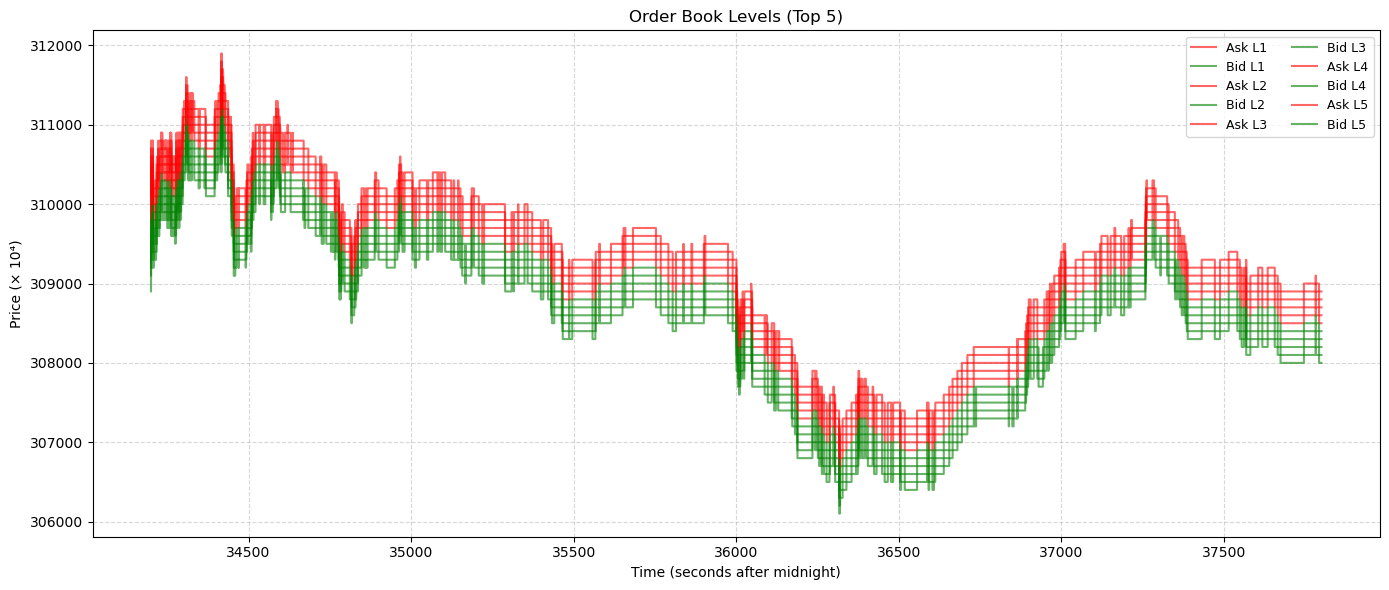

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# On combine la colonne Time avec le carnet
df_OB_with_time = df_OB.copy()
df_OB_with_time["Time"] = df_message["Time"].values

# Choisir le nombre de niveaux à afficher (par ex. top 5)
num_levels_to_plot = 5

# Préparer la figure
plt.figure(figsize=(14, 6))

# Tracer les Ask et Bid
for i in range(1, num_levels_to_plot + 1):
    plt.plot(df_OB_with_time["Time"], df_OB_with_time[f"AskPrice_{i}"], 
             label=f"Ask L{i}", color="red", alpha=0.6)
    plt.plot(df_OB_with_time["Time"], df_OB_with_time[f"BidPrice_{i}"], 
             label=f"Bid L{i}", color="green", alpha=0.6)

plt.xlabel("Time (seconds after midnight)")
plt.ylabel("Price (× 10⁴)")
plt.title(f"Order Book Levels (Top {num_levels_to_plot})")
plt.legend(ncol=2, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


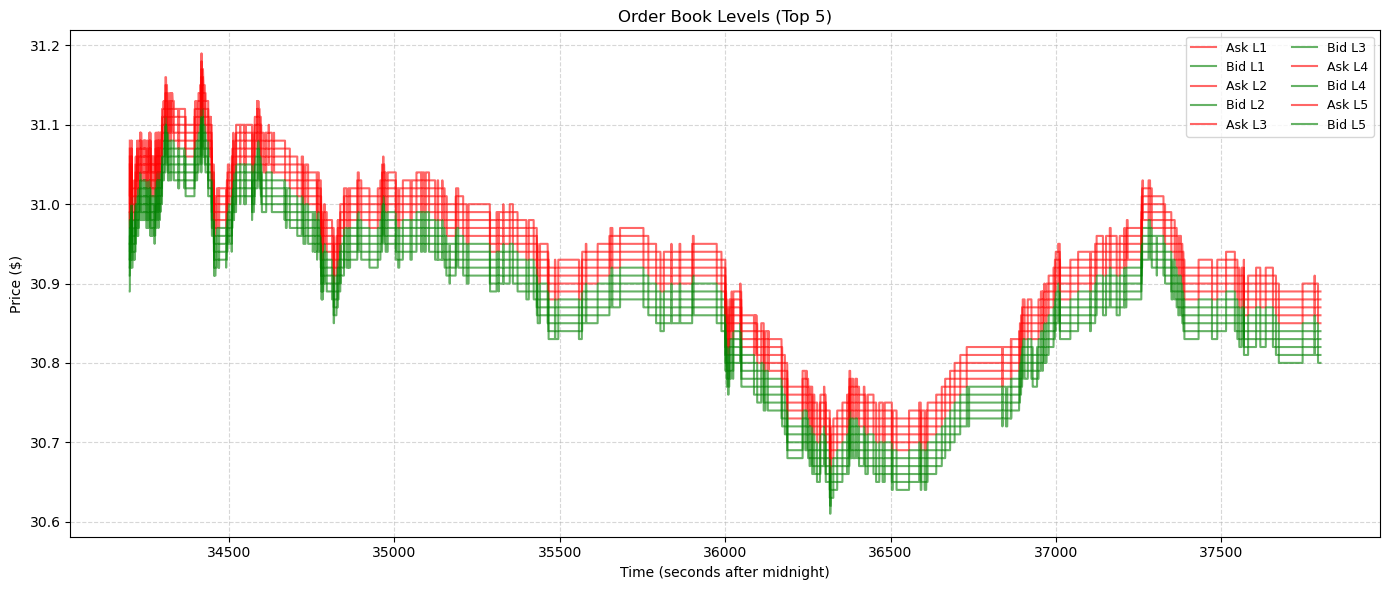

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Copie du carnet et ajout du temps
df_OB_with_time = df_OB.copy()
df_OB_with_time["Time"] = df_message["Time"].values

# Conversion des prix (Ask et Bid) en prix réels
price_cols = [col for col in df_OB.columns if "Price" in col]
df_OB_with_time[price_cols] = df_OB_with_time[price_cols] / 10_000

# Choisir le nombre de niveaux à afficher
num_levels_to_plot = 5

# Tracer
plt.figure(figsize=(14, 6))
for i in range(1, num_levels_to_plot + 1):
    plt.plot(df_OB_with_time["Time"], df_OB_with_time[f"AskPrice_{i}"], 
             label=f"Ask L{i}", color="red", alpha=0.6)
    plt.plot(df_OB_with_time["Time"], df_OB_with_time[f"BidPrice_{i}"], 
             label=f"Bid L{i}", color="green", alpha=0.6)

plt.xlabel("Time (seconds after midnight)")
plt.ylabel("Price ($)")
plt.title(f"Order Book Levels (Top {num_levels_to_plot})")
plt.legend(ncol=2, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_5095/2182105120.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_OB_with_time["MidPrice"] = (


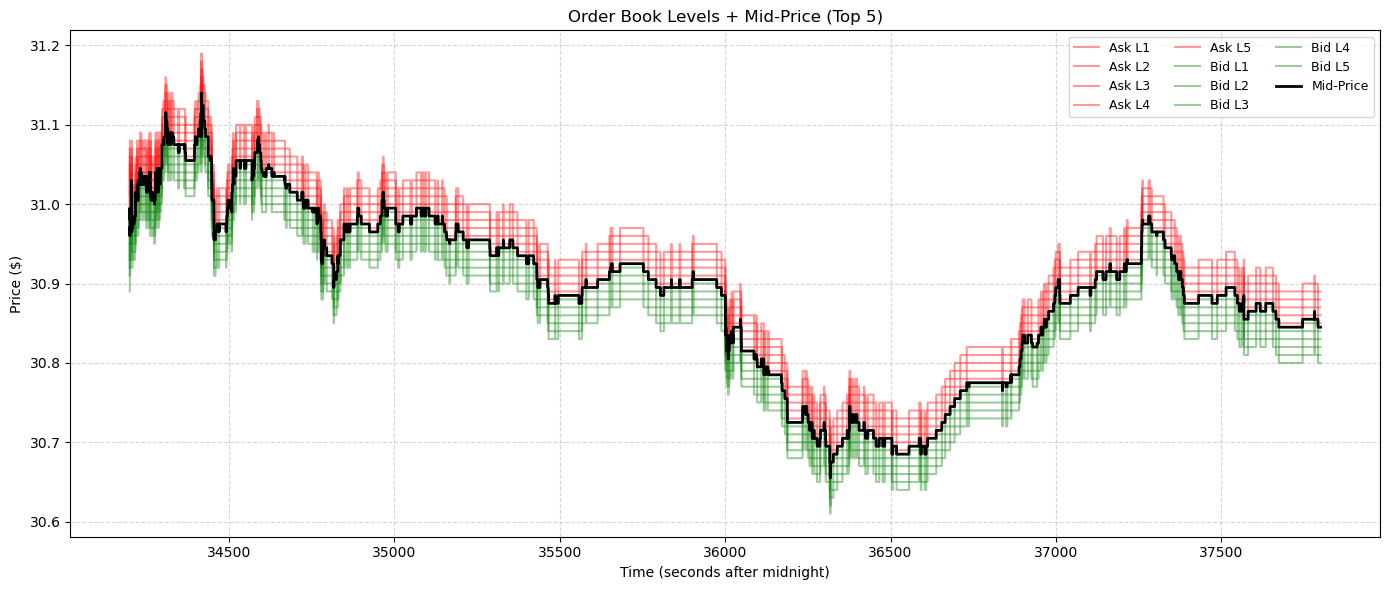

In [ ]:
# Copie du carnet et ajout du temps
df_OB_with_time = df_OB.copy()
df_OB_with_time["Time"] = df_message["Time"].values

# Conversion des prix en dollars
price_cols = [col for col in df_OB.columns if "Price" in col]
df_OB_with_time[price_cols] = df_OB_with_time[price_cols] / 10_000

# Calcul du mid-price : (Best Ask + Best Bid) / 2
df_OB_with_time["MidPrice"] = (
    df_OB_with_time["AskPrice_1"] + df_OB_with_time["BidPrice_1"]
) / 2

# Choisir le nombre de niveaux à afficher
num_levels_to_plot = 5

# Tracer
plt.figure(figsize=(14, 6))

# Ask levels
for i in range(1, num_levels_to_plot + 1):
    plt.plot(df_OB_with_time["Time"], df_OB_with_time[f"AskPrice_{i}"], 
             label=f"Ask L{i}", color="red", alpha=0.4)

# Bid levels
for i in range(1, num_levels_to_plot + 1):
    plt.plot(df_OB_with_time["Time"], df_OB_with_time[f"BidPrice_{i}"], 
             label=f"Bid L{i}", color="green", alpha=0.4)

# Mid-price
plt.plot(df_OB_with_time["Time"], df_OB_with_time["MidPrice"], 
         label="Mid-Price", color="black", linewidth=2)

plt.xlabel("Time (seconds after midnight)")
plt.ylabel("Price ($)")
plt.title(f"Order Book Levels + Mid-Price (Top {num_levels_to_plot})")
plt.legend(ncol=3, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# Explore AAPL OB

In [17]:
df_message_AAPL = pd.read_csv("Data/LOBSTER_SampleFile_AAPL_2012-06-21_50/AAPL_2012-06-21_34200000_37800000_message_50.csv")
df_message_AAPL.head()

,34200.004241176,1,16113575,18,5853300,1.1
0,34200.004261,1,16113584,18,5853200,1
1,34200.004447,1,16113594,18,5853100,1
2,34200.025552,1,16120456,18,5859100,-1
3,34200.025580,1,16120480,18,5859200,-1
4,34200.025613,1,16120503,18,5859300,-1


In [18]:
df_AAPL_OB  = pd.read_csv("Data/LOBSTER_SampleFile_AAPL_2012-06-21_50/AAPL_2012-06-21_34200000_37800000_orderbook_50.csv")
df_AAPL_OB.head()

,5859400,200,5853300,18,5859800,200.1,5853000,150,5861000,200.2,...,4689600,200.4,9999999999.8,0.8,4689500,1900,9999999999.9,0.9,4689400,400.3
0,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,4736500,100,9999999999,0,4689600,200,9999999999,0,4689500,1900
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,4785900,100,9999999999,0,4736500,100,9999999999,0,4689600,200
2,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,4785900,100,9999999999,0,4736500,100,9999999999,0,4689600,200
3,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,4785900,100,9999999999,0,4736500,100,9999999999,0,4689600,200
4,5859100,18,5853300,18,5859200,18,5853200,18,5859300,18,...,4785900,100,9999999999,0,4736500,100,9999999999,0,4689600,200


In [19]:
# Renommer les colonnes de df_messages selon la spécification
rename_mapping = {
    df_message_AAPL.columns[0]: "Time",        # Seconds after midnight (float, ms à ns)
    df_message_AAPL.columns[1]: "Type",        # Type d'événement (1,2,3,4,5,7)
    df_message_AAPL.columns[2]: "OrderID",     # Identifiant unique de l'ordre
    df_message_AAPL.columns[3]: "Size",        # Nombre d'actions
    df_message_AAPL.columns[4]: "Price",       # Prix * 10 000
    df_message_AAPL.columns[5]: "Direction"    # -1: Sell, 1: Buy
}

df_message_AAPL = df_message_AAPL.rename(columns=rename_mapping)

# Vérification
print(df_message_AAPL.head())
print("\nColonnes renommées :", df_message_AAPL.columns.tolist())


           Time  Type   OrderID  Size    Price  Direction
0  34200.004261     1  16113584    18  5853200          1
1  34200.004447     1  16113594    18  5853100          1
2  34200.025552     1  16120456    18  5859100         -1
3  34200.025580     1  16120480    18  5859200         -1
4  34200.025613     1  16120503    18  5859300         -1

Colonnes renommées : ['Time', 'Type', 'OrderID', 'Size', 'Price', 'Direction']


In [20]:
# Nombre de niveaux du carnet d'ordres
num_levels = 50

# Construction de la liste des nouveaux noms de colonnes
new_columns = []
for level in range(1, num_levels + 1):
    new_columns += [
        f"AskPrice_{level}",  # Prix Ask du niveau i
        f"AskSize_{level}",   # Volume Ask du niveau i
        f"BidPrice_{level}",  # Prix Bid du niveau i
        f"BidSize_{level}",   # Volume Bid du niveau i
    ]

# Vérification du nombre de colonnes
if len(df_AAPL_OB.columns) != len(new_columns):
    raise ValueError(
        f"Le DataFrame df_OB contient {len(df_AAPL_OB.columns)} colonnes, "
        f"mais {len(new_columns)} étaient attendues pour {num_levels} niveaux."
    )

# Application du renommage
df_AAPL_OB.columns = new_columns

# Vérification
print(df_AAPL_OB.columns[:8])  # affiche les premières colonnes pour vérif
print(f"\nTotal colonnes renommées : {len(df_AAPL_OB.columns)}")


Index(['AskPrice_1', 'AskSize_1', 'BidPrice_1', 'BidSize_1', 'AskPrice_2',
       'AskSize_2', 'BidPrice_2', 'BidSize_2'],
      dtype='object')

Total colonnes renommées : 200


In [21]:
df_AAPL_OB.head()

,AskPrice_1,AskSize_1,BidPrice_1,BidSize_1,AskPrice_2,AskSize_2,BidPrice_2,BidSize_2,AskPrice_3,AskSize_3,...,BidPrice_48,BidSize_48,AskPrice_49,AskSize_49,BidPrice_49,BidSize_49,AskPrice_50,AskSize_50,BidPrice_50,BidSize_50
0,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,4736500,100,9999999999,0,4689600,200,9999999999,0,4689500,1900
1,5859400,200,5853300,18,5859800,200,5853200,18,5861000,200,...,4785900,100,9999999999,0,4736500,100,9999999999,0,4689600,200
2,5859100,18,5853300,18,5859400,200,5853200,18,5859800,200,...,4785900,100,9999999999,0,4736500,100,9999999999,0,4689600,200
3,5859100,18,5853300,18,5859200,18,5853200,18,5859400,200,...,4785900,100,9999999999,0,4736500,100,9999999999,0,4689600,200
4,5859100,18,5853300,18,5859200,18,5853200,18,5859300,18,...,4785900,100,9999999999,0,4736500,100,9999999999,0,4689600,200


/var/folders/nk/kpj6413n2lj1cln9c1z0_pj80000gn/T/ipykernel_5095/3248610267.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_OB_with_time["MidPrice"] = (


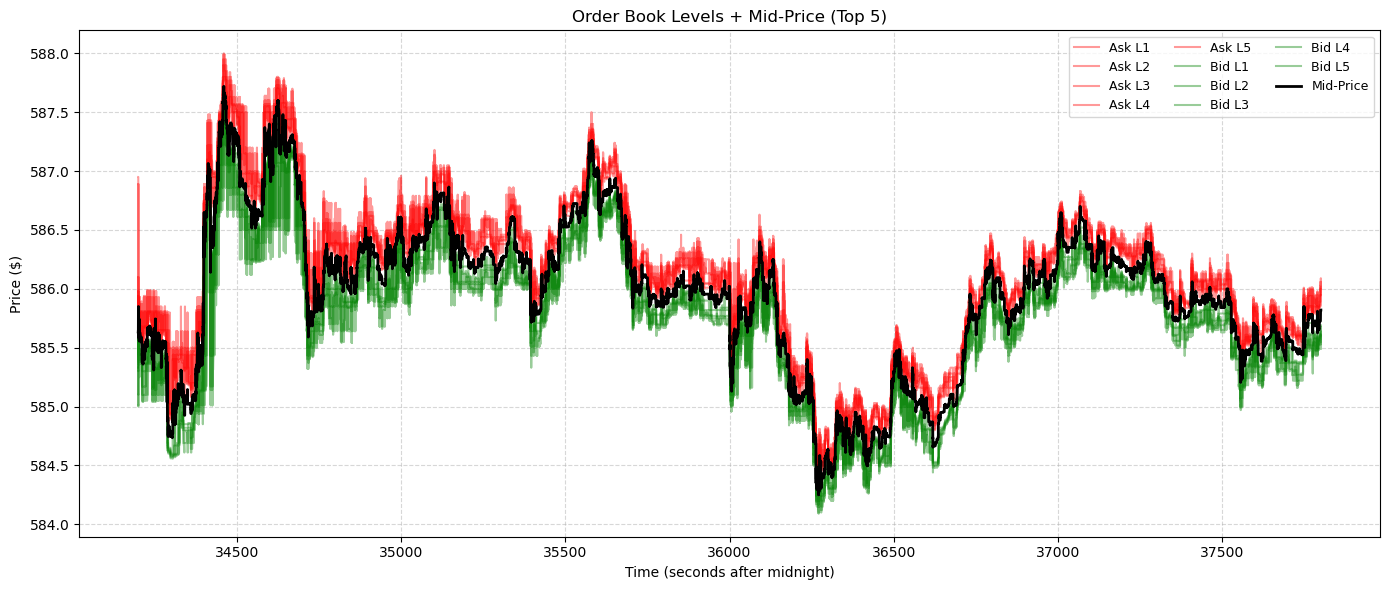

In [24]:
# Copie du carnet et ajout du temps
df_OB_with_time = df_AAPL_OB.copy()
df_OB_with_time["Time"] = df_message_AAPL["Time"].values

# Conversion des prix en dollars
price_cols = [col for col in df_AAPL_OB.columns if "Price" in col]
df_OB_with_time[price_cols] = df_OB_with_time[price_cols] / 10_000

# Calcul du mid-price : (Best Ask + Best Bid) / 2
df_OB_with_time["MidPrice"] = (
    df_OB_with_time["AskPrice_1"] + df_OB_with_time["BidPrice_1"]
) / 2

# Choisir le nombre de niveaux à afficher
num_levels_to_plot = 5

# Tracer
plt.figure(figsize=(14, 6))

# Ask levels
for i in range(1, num_levels_to_plot + 1):
    plt.plot(df_OB_with_time["Time"], df_OB_with_time[f"AskPrice_{i}"], 
             label=f"Ask L{i}", color="red", alpha=0.4)

# Bid levels
for i in range(1, num_levels_to_plot + 1):
    plt.plot(df_OB_with_time["Time"], df_OB_with_time[f"BidPrice_{i}"], 
             label=f"Bid L{i}", color="green", alpha=0.4)

# Mid-price
plt.plot(df_OB_with_time["Time"], df_OB_with_time["MidPrice"], 
         label="Mid-Price", color="black", linewidth=2)

plt.xlabel("Time (seconds after midnight)")
plt.ylabel("Price ($)")
plt.title(f"Order Book Levels + Mid-Price (Top {num_levels_to_plot})")
plt.legend(ncol=3, fontsize=9)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


# Static View of the OB 

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Snapshot à visualiser
row_idx = 0
snapshot = df_OB.iloc[row_idx]

num_levels = 50

# Récupération des prix et tailles
ask_prices = np.array([snapshot[f"AskPrice_{i}"] for i in range(1, num_levels+1)], dtype=float) / 10_000
bid_prices = np.array([snapshot[f"BidPrice_{i}"] for i in range(1, num_levels+1)], dtype=float) / 10_000
ask_sizes = np.array([snapshot[f"AskSize_{i}"] for i in range(1, num_levels+1)], dtype=float)
bid_sizes = np.array([snapshot[f"BidSize_{i}"] for i in range(1, num_levels+1)], dtype=float)

# Filtrer toutes les positions où le volume est > 0 et le prix n'est pas dummy
ask_mask = (ask_sizes > 1) & (ask_prices < 10*ask_prices[0])
bid_mask = (bid_sizes > 1) & (bid_prices > 10*bid_prices[0])

ask_prices = ask_prices[ask_mask]
ask_sizes = ask_sizes[ask_mask]
bid_prices = bid_prices[bid_mask]
bid_sizes = bid_sizes[bid_mask]

In [83]:
ask_prices

array([30.99, 31.05, 31.06, 31.07, 31.08, 31.09, 31.1 , 31.11, 31.13,
       31.14, 31.15, 31.16, 31.18, 31.28, 31.35, 31.38, 31.5 , 31.69,
       31.84, 32.5 , 32.68, 32.92, 33.29, 33.79, 33.9 , 34.48, 34.66,
       36.36, 36.63, 36.78, 37.18, 37.2 , 37.21, 39.24])

In [84]:
print(ask_prices.size)

34


In [85]:
ask_sizes.size

34

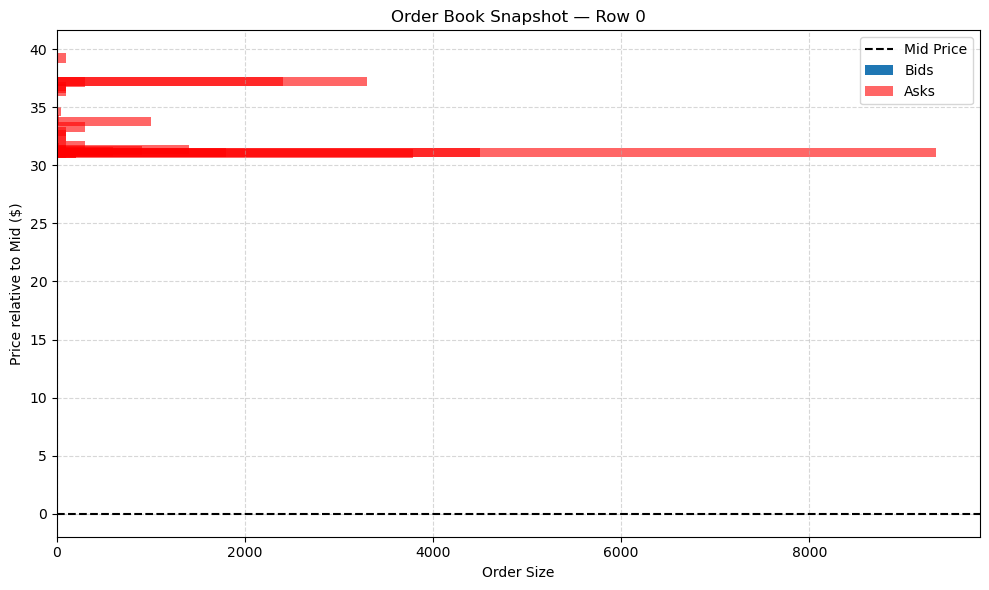

In [86]:
if len(ask_prices) > 0:
    sorted_idx = np.argsort(ask_prices)
    ask_prices = ask_prices[sorted_idx]
    ask_sizes = ask_sizes[sorted_idx]

# Calcul du mid-price
if len(ask_prices) > 0 and len(bid_prices) > 0:
    mid_price = (ask_prices[0] + bid_prices[0]) / 2
else:
    mid_price = 0

# Décalage des prix pour centrer sur le mid-price
bid_prices_centered = bid_prices - mid_price
ask_prices_centered = ask_prices - mid_price

# Plot
plt.figure(figsize=(10, 6))
plt.barh(bid_prices_centered, -bid_sizes, color="green", alpha=0.6, label="Bids")
plt.barh(ask_prices_centered, ask_sizes, color="red", alpha=0.6, label="Asks")

# Ligne mid-price
plt.axhline(0, color="black", linestyle="--", label="Mid Price")

plt.xlabel("Order Size")
plt.ylabel("Price relative to Mid ($)")
plt.title(f"Order Book Snapshot — Row {row_idx}")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()